In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import keras 

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

In [4]:
mnist = pd.read_csv(r'F:\DS\KAGGLE DATASET\Neural Network\mnist_test.csv')

In [5]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist.shape

(10000, 785)

Image data has no nulls and nonnumaric but just for check it your confirmation

In [7]:
mnist.columns[mnist.isnull().sum()> 0]

Index([], dtype='object')

In [8]:
mnist.columns[mnist.dtypes == 'object']

Index([], dtype='object')

In [9]:
abcd = np.array(mnist.iloc[0 , 1:])

In [10]:
abcd.shape

(784,)

In [11]:
np.sqrt(784)

28.0

Therefore reshape it into ( 28,28)

In [12]:
abcd = abcd.reshape(28,28)

In [13]:
abcd.shape

(28, 28)

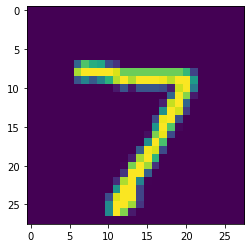

In [14]:
plt.imshow(abcd);

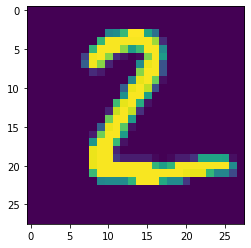

In [15]:
abcd = np.array(mnist.iloc[1 , 1:])
abcd = abcd.reshape(28,28)
plt.imshow(abcd);

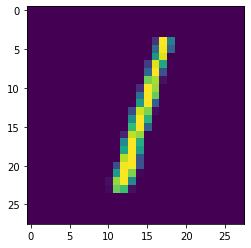

In [16]:
abcd = np.array(mnist.iloc[2 , 1:])
abcd = abcd.reshape(28,28)
plt.imshow(abcd);

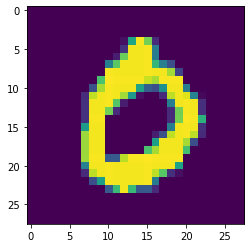

In [17]:
abcd = np.array(mnist.iloc[3 , 1:])
abcd = abcd.reshape(28,28)
plt.imshow(abcd);

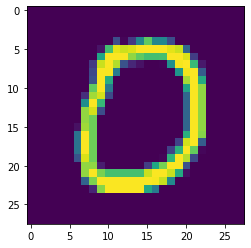

In [18]:
abcd = np.array(mnist.iloc[10 , 1:])
abcd = abcd.reshape(28,28)
plt.imshow(abcd);

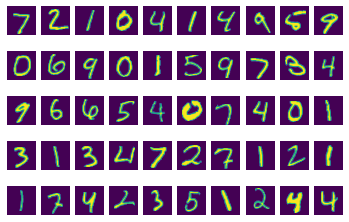

In [19]:
mnist1 = mnist.iloc[:, 1:786]
mnist1 = np.array(mnist1)
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(mnist1[i , :].reshape(28,28))
    plt.axis('off')

## Building a NN model

In [20]:
mnist = pd.read_csv(r'F:\DS\KAGGLE DATASET\Neural Network\mnist_test.csv')

In [21]:
mnist_x = mnist.iloc[: , 1:786] 
mnist_y = mnist.iloc[: , 0]

In [22]:
from sklearn.model_selection import train_test_split
mnist_x_train,mnist_x_test, mnist_y_train,mnist_y_test = train_test_split(mnist_x,mnist_y ,test_size = 0.2, random_state = 420)

In [23]:
print(mnist_x_train.shape)
print(mnist_y_train.shape)

(8000, 784)
(8000,)


In [24]:
print(mnist_x_test.shape)
print(mnist_y_test.shape)

(2000, 784)
(2000,)


### For Tensorflow  (NN) your data has to be in array format and not in DF format because for doing mathematical calculations we can't do on DataFrame

In [25]:
mnist_x_train = np.array(mnist_x_train)
mnist_x_test  = np.array(mnist_x_test)

In [26]:
mnist_y_train = np.array(mnist_y_train)

### And then Normalize the data ( It is not mandnatory but if you normalize the data you get the better model

In [27]:
mnist_x_train = tf.keras.utils.normalize(mnist_x_train)
mnist_x_test  = tf.keras.utils.normalize(mnist_x_test)

In [28]:
# list(mnist_x_train[0:])

In [29]:
model = tf.keras.models.Sequential()  # initialize the model
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  # 1st hidden layer
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))  # 2nd hidden layer
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))  # 3rd hidden layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))# o/p layer this 10 is not a hyperparameter
# its mapped to number of levels in y 
# here 128 and 256 are the no of neurons which is always take in 2 power for good model take neuron 
# more than 100, and atleast hidden layer 3 to 5 which gives good result 

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# adam = is like GD
# sparse_categorical_crossentropy is cross entropy (loss)
# metrics = 

In [30]:
abcd = model.fit(mnist_x_train,mnist_y_train, epochs = 50,validation_split = 0.2, batch_size = 100)

Epoch 1/50
64/64 [==============================] - 2s 18ms/step - loss: 1.2688 - accuracy: 0.6672 - val_loss: 0.4761 - val_accuracy: 0.8569
Epoch 2/50
64/64 [==============================] - 1s 10ms/step - loss: 0.3742 - accuracy: 0.8902 - val_loss: 0.3820 - val_accuracy: 0.8856
Epoch 3/50
64/64 [==============================] - 1s 11ms/step - loss: 0.2848 - accuracy: 0.9145 - val_loss: 0.3367 - val_accuracy: 0.8963
Epoch 4/50
64/64 [==============================] - 1s 10ms/step - loss: 0.2328 - accuracy: 0.9280 - val_loss: 0.3028 - val_accuracy: 0.9087
Epoch 5/50
64/64 [==============================] - 1s 10ms/step - loss: 0.1985 - accuracy: 0.9358 - val_loss: 0.2791 - val_accuracy: 0.9206
Epoch 6/50
64/64 [==============================] - 1s 9ms/step - loss: 0.1693 - accuracy: 0.9480 - val_loss: 0.2517 - val_accuracy: 0.9281
Epoch 7/50
64/64 [==============================] - 1s 14ms/step - loss: 0.1424 - accuracy: 0.9559 - val_loss: 0.2596 - val_accuracy: 0.9250
Epoch 8/50
64/

In [31]:
model.predict(mnist_x_test)

array([[5.04348660e-04, 8.49921804e-13, 9.99203503e-01, ...,
        3.10614978e-10, 6.02157213e-10, 2.63644104e-14],
       [1.74474879e-14, 1.70099503e-12, 1.00000000e+00, ...,
        1.16529907e-21, 7.86115617e-11, 3.30318556e-26],
       [3.39379870e-16, 9.99999881e-01, 1.95313543e-10, ...,
        1.69849779e-09, 7.15571824e-09, 1.27158839e-11],
       ...,
       [4.37326600e-14, 1.03856562e-10, 4.36674655e-11, ...,
        2.90154456e-14, 4.39934200e-11, 1.82589408e-15],
       [1.00000000e+00, 6.34464574e-21, 3.01826168e-11, ...,
        1.20768449e-16, 7.18198567e-09, 6.15604442e-11],
       [5.27847052e-20, 9.99999881e-01, 2.63899944e-11, ...,
        5.91157487e-08, 6.95833391e-10, 1.10276874e-11]], dtype=float32)

In [32]:
pred_prob=model.predict(mnist_x_test)

In [33]:
pred_prob[0]

array([5.0434866e-04, 8.4992180e-13, 9.9920350e-01, 2.9212912e-04,
       3.3515557e-09, 6.3557093e-09, 6.5602351e-10, 3.1061498e-10,
       6.0215721e-10, 2.6364410e-14], dtype=float32)

In [34]:
pred_prob[0].sum()

1.0

In [35]:
np.argmax(pred_prob[0])

2

In [36]:
pred_classes = np.argmax(pred_prob, axis = 1)

In [37]:
pred_classes

array([2, 2, 1, ..., 3, 0, 1], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(mnist_y_test,pred_classes)
tab

array([[179,   0,   0,   1,   0,   0,   0,   1,   0,   1],
       [  0, 202,   1,   0,   0,   1,   0,   1,   0,   0],
       [  3,   0, 203,   1,   2,   1,   0,   2,   2,   0],
       [  0,   0,   2, 188,   0,   5,   0,   3,   3,   2],
       [  0,   0,   1,   0, 190,   0,   2,   0,   1,   4],
       [  1,   2,   0,   3,   2, 154,   4,   3,   2,   1],
       [  2,   0,   0,   0,   1,   5, 173,   0,   0,   0],
       [  0,   2,   5,   3,   1,   1,   0, 211,   0,   0],
       [  0,   3,   2,   2,   1,   2,   1,   2, 192,   2],
       [  2,   0,   0,   1,   3,   1,   0,   2,   2, 204]], dtype=int64)

In [39]:
tab.diagonal().sum() * 100  / tab.sum()

94.8

In [40]:
abcd.history

{'loss': [1.2687870264053345,
  0.37418049573898315,
  0.2847762405872345,
  0.23280306160449982,
  0.19850875437259674,
  0.16927622258663177,
  0.14244908094406128,
  0.13012605905532837,
  0.10496586561203003,
  0.08711469918489456,
  0.07403483241796494,
  0.062060292810201645,
  0.052354440093040466,
  0.0382237434387207,
  0.03740047663450241,
  0.031785182654857635,
  0.024800555780529976,
  0.01717865653336048,
  0.015727858990430832,
  0.010837038978934288,
  0.009149132296442986,
  0.006300602573901415,
  0.005826849956065416,
  0.005136442370712757,
  0.0038010375574231148,
  0.0032158964313566685,
  0.0033790352754294872,
  0.0028702886775135994,
  0.0021981396712362766,
  0.0019751866348087788,
  0.0017099594697356224,
  0.0015904194442555308,
  0.0015522551257163286,
  0.0012597691966220737,
  0.00109415827319026,
  0.0009953650878742337,
  0.000904033484403044,
  0.0008367350092157722,
  0.0007855419535189867,
  0.0006957136210985482,
  0.0006569166434928775,
  0.0006159

In [41]:
type(model.history)

keras.callbacks.History

In [42]:
df1 = pd.DataFrame(abcd.history)

In [43]:
df1

,loss,accuracy,val_loss,val_accuracy
0,1.268787,0.667188,0.476129,0.856875
1,0.374180,0.890156,0.381961,0.885625
2,0.284776,0.914531,0.336745,0.896250
3,0.232803,0.927969,0.302785,0.908750
4,0.198509,0.935781,0.279084,0.920625
5,0.169276,0.947969,0.251657,0.928125
6,0.142449,0.955938,0.259645,0.925000
7,0.130126,0.957344,0.253645,0.926250
8,0.104966,0.967344,0.241545,0.931250
9,0.087115,0.973281,0.231800,0.935625


In [44]:
import matplotlib.pyplot as plt

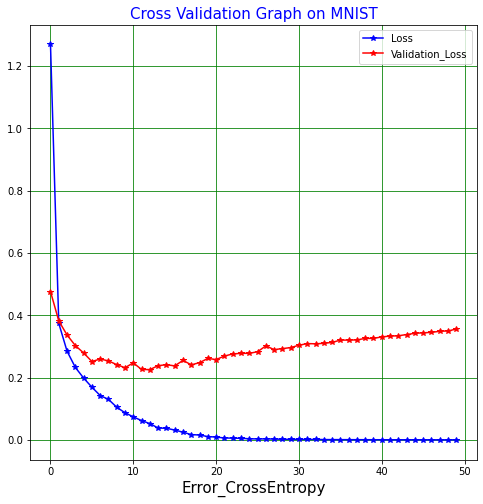

In [45]:
plt.figure(figsize = (8 ,8))
plt.plot(df1.loss, color = 'b', label='Loss', marker = '*')
plt.plot(df1.val_loss, color = 'r', label='Validation_Loss', marker = '*')
plt.xlabel('Iterations', size = 15)
plt.xlabel('Error_CrossEntropy', size = 15)
plt.title('Cross Validation Graph on MNIST', color = 'blue',size = 15)
plt.grid(color = 'green')
plt.legend()


* Hence from the above graph it is clear thet after 14th iteratin validation loss increasing so next time you have to take only 
* 14 iteration for the given model

In [ ]:
# from keras.layer import dropout
# model.add(Dropout(0.2))
# optimizer = tf.keras.optimizers.RMSprop(5)
# model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])